# 0. Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Helper Fuctions
from matplotlib import pyplot as plt
from IPython.core.display import HTML

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.1 Load Data

In [4]:
df_raw = pd.read_csv('data/df_ready.csv')

In [5]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [6]:
df_raw.head()

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017/09/08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36
2,2017/10/24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,24,43
3,2017/08/15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,15,33
4,2017/09/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,9,September,14,37


# 1. Descrição dos Dados

In [7]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [8]:
cols_name = ['date_imp', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'dateadded', 'dateseen', 'dateupdated', 'manufacturer',
       'day_n', 'month', 'month_n', 'day', 'week_number']
df1.columns = cols_name

## 1.2 Data Dimension

In [9]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of cols: {df1.shape[1]}')

Number of rows: 23151
Number of cols: 20


## 1.3 Data Types

In [10]:
df1.dtypes

date_imp            object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
dateadded           object
dateseen            object
dateupdated         object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

date_imp               0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
dateadded              0
dateseen               0
dateupdated            0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

Explicação das colunas principais: 
* date_imp: data que foi feita a compra 
* category_name: diferentes categorias do produto 
* name: nome do produto 
* price: preço
* disc: desconto que foi dado
* merchant: loja 
* brand: quem construiu

## 1.5 cHANGE tYPES

In [12]:
df1['date_imp'] = pd.to_datetime( df1['date_imp'])

## 1.7 Descriptive Statistics

In [13]:
num_attributes = df1.select_dtypes( include=['float64', 'int64'])
cat_attributes = df1.select_dtypes( exclude=['float64', 'int64', 'datetime64[ns]'])

### 1.7.1 Numerical Attributes

In [14]:
# central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean) ).T   # média
ct2 = pd.DataFrame(num_attributes.apply(np.median) ).T  # mediana

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std) ).T # Desvio padrão
d2 = pd.DataFrame(num_attributes.apply(min) ).T # valor mínimo
d3 = pd.DataFrame(num_attributes.apply(max) ).T # valor máximo
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew())).T #skewness
d6 = pd.DataFrame(num_attributes.apply( lambda x : x.kurtosis())).T # kurtosis

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m

,att,min,max,range,mean,median,std,skew,kurt
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


Essa análise a priori é inconclusiva porque estamos analisando produtos diferente, exemplo o mínimo pode ser uma bala e o valor máximo pode ser um macbook. Com isso, não tem como comparamos produtos diferentes de lojas diferentes!

# 2.0 Exploratory Data Analysis

In [15]:
df2 = df1.copy()

In [16]:
df2.columns

Index(['date_imp', 'category_name', 'name', 'price', 'disc_price', 'merchant',
       'disc_percentage', 'is_sale', 'imp_count', 'brand', 'p_description',
       'dateadded', 'dateseen', 'dateupdated', 'manufacturer', 'day_n',
       'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 2.1 Hipóteses

- Qual o merchant que mais vende? 
- Qual a categoria mais vendida? 
- Qual a marca mais vendida? 
- Qual os meses que mais vende? 
- Quais dias da semana mais vende?

#### 1. Qual o merchant que mais vende? 

In [17]:
ax1 = df2[["date_imp", "merchant"]].groupby("merchant").count().reset_index().sort_values(by="date_imp",ascending=False)
ax1

,merchant,date_imp
1,Bestbuy.com,11287
4,bhphotovideo.com,5064
2,Walmart.com,3947
5,ebay.com,2809
0,Amazon.com,25
6,kmart.com,17
3,barcodable.com,2


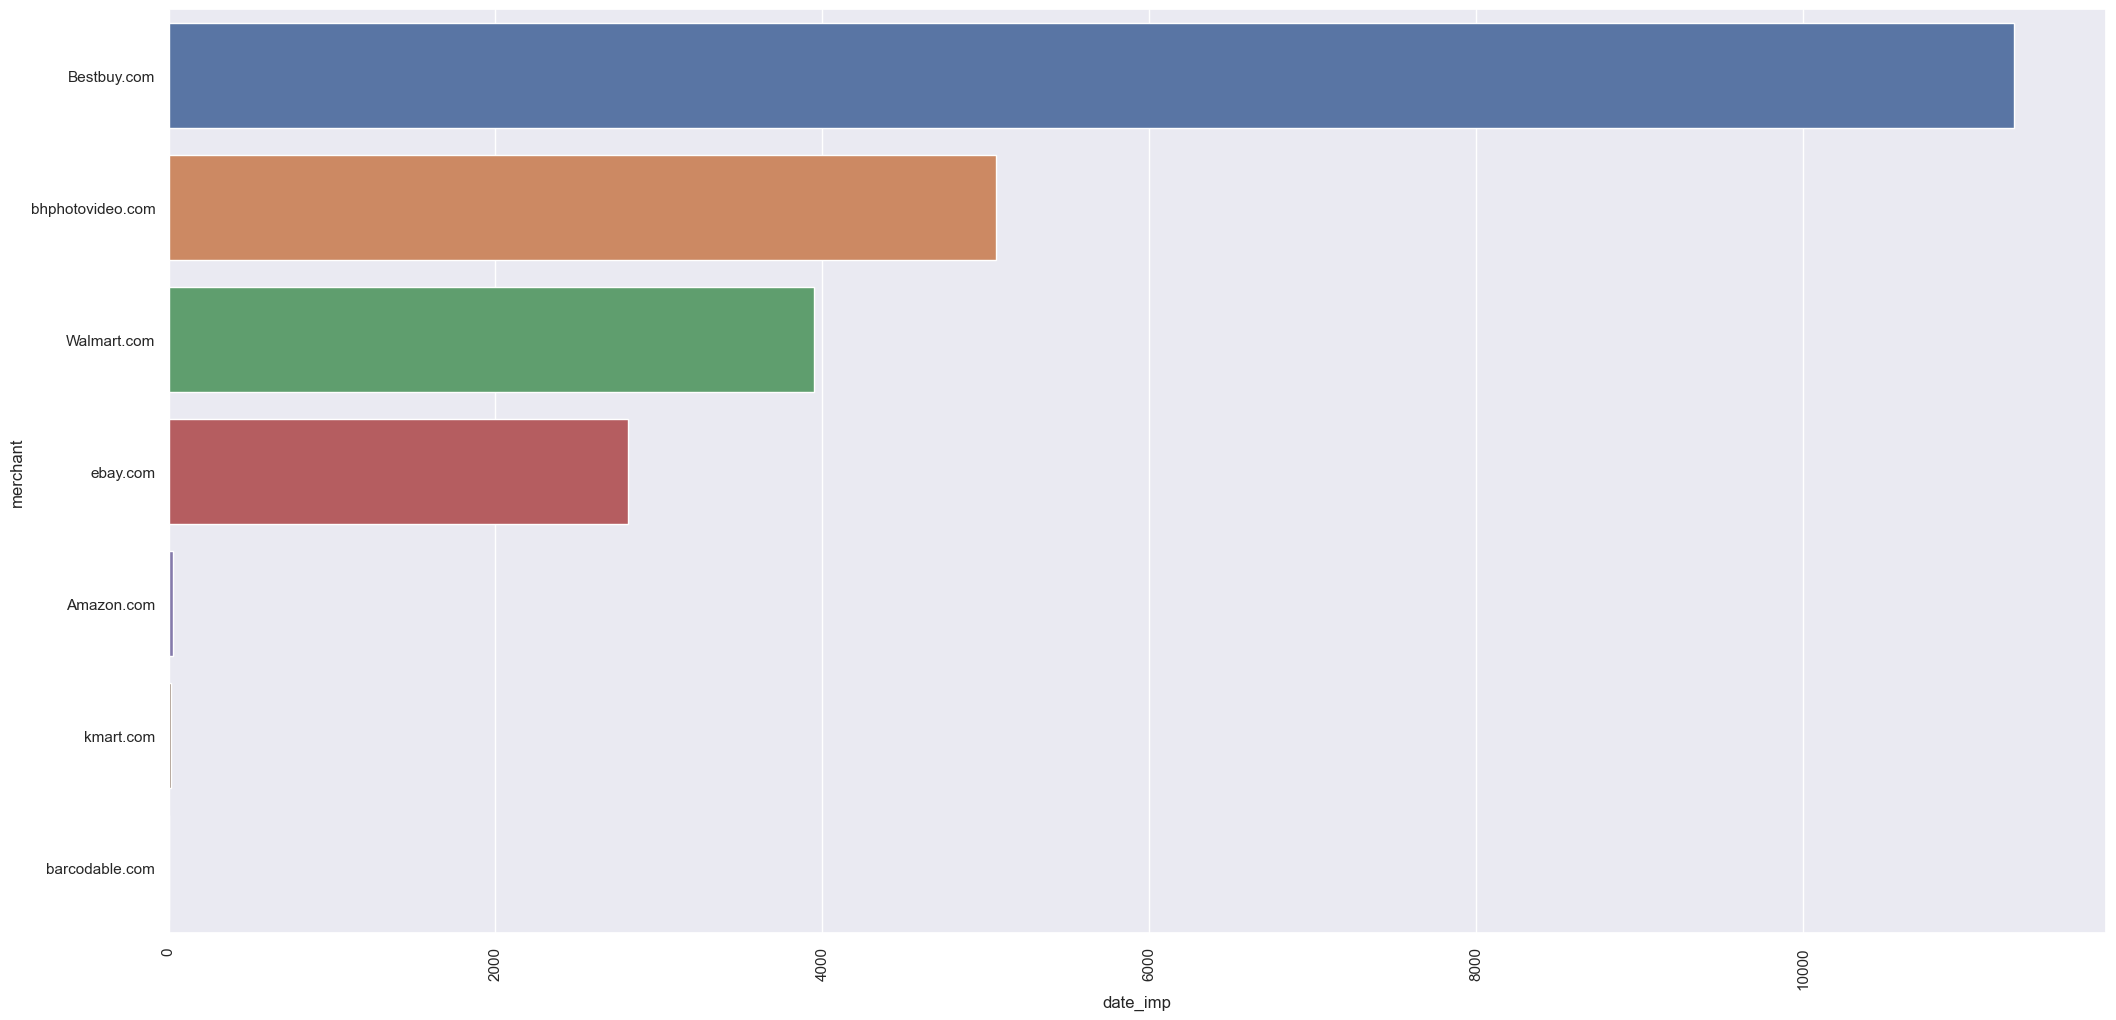

In [18]:
sns.barplot(y="merchant", x="date_imp", data=ax1, orient="h")
plt.xticks(rotation=90)  
plt.show()

A bestbuy foi a loja onde mais ocorreu vendas

In [19]:
# análise individual das lojas 
df_best     = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp      = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart  = df2[df2['merchant'] == 'Walmart.com']
df_ebay     = df2[df2['merchant'] == 'ebay.com']

### 2. Qual categoria mais vendida?

#### 2.1. Categorias mais vendidas no geral? 

In [20]:
aux2 = df2[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
aux2

,category_name,date_imp
57,"tv, television, video",2130
27,"laptop, computer",1715
50,"speaker, portable, bluetooth",1104
5,"camera, mirrorless, photo",1072
9,"car, speaker, subwoofer",865
41,"receiver, amplifier, home",817
6,"camera, shoot",744
15,"drive, storage, hard",719
16,"drive, storage, internal",718
8,"car, receiver, dash",712


tv, television, video é a categoria mais vendida

#### 2. 5 Categorias mais vendidas por loja

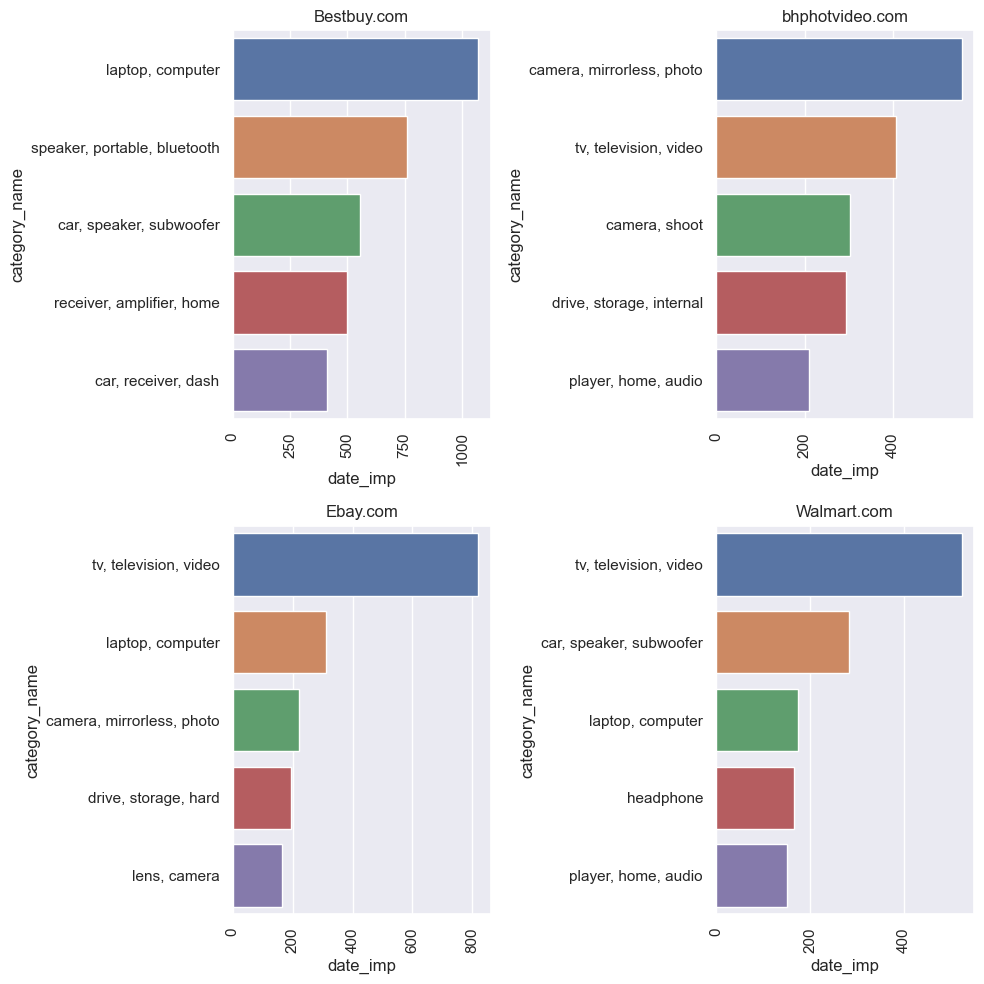

In [21]:
plt.figure(figsize=(10,10))

# Para Bestbuy.com
plt.subplot(2,2,1)
aux3 = df_best[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_bestbuy = aux3.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('Bestbuy.com')
sns.barplot(y='category_name', x='date_imp', data=top10_bestbuy)

# Para bhphotvideo.com
plt.subplot(2,2,2)
aux4 = df_bhp[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_bhp = aux4.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('bhphotvideo.com')
sns.barplot(y='category_name',x='date_imp', data=top10_bhp)

# Para Ebay.com
plt.subplot(2,2,3)
aux5 = df_ebay[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_ebay = aux5.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('Ebay.com')
sns.barplot(y='category_name', x='date_imp', data=top10_ebay)

# Para Walmart.com
plt.subplot(2,2,4)
aux6 = df_walmart[['date_imp', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp', ascending=False)
top10_walmart = aux6.head(5)  # Pegar os top 10
plt.xticks(rotation=90)
plt.title('Walmart.com')
sns.barplot(y='category_name', x='date_imp', data=top10_walmart)

plt.tight_layout()
plt.show()

Tv, television e video são as categorias mais vendidas no Walmart e Ebay. No restante as categorias são variadas!

### 3. Qual a marca mais vendida 

#### 3.1 Qual a marca mais vendida no geral

In [22]:
plt.figure(figsize=(20,10))
aux7 = df2[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
aux7.head(10)

,brand,date_imp
213,Sony,3205
189,Samsung,1924
12,Apple,1771
254,Yamaha,721
166,Pioneer,559
37,Canon,528
109,Kenwood,458
146,Nikon,449
97,JBL,385
190,SanDisk,361


<Figure size 2000x1000 with 0 Axes>

#### 3.2 Qual a marca mais vendida por loja

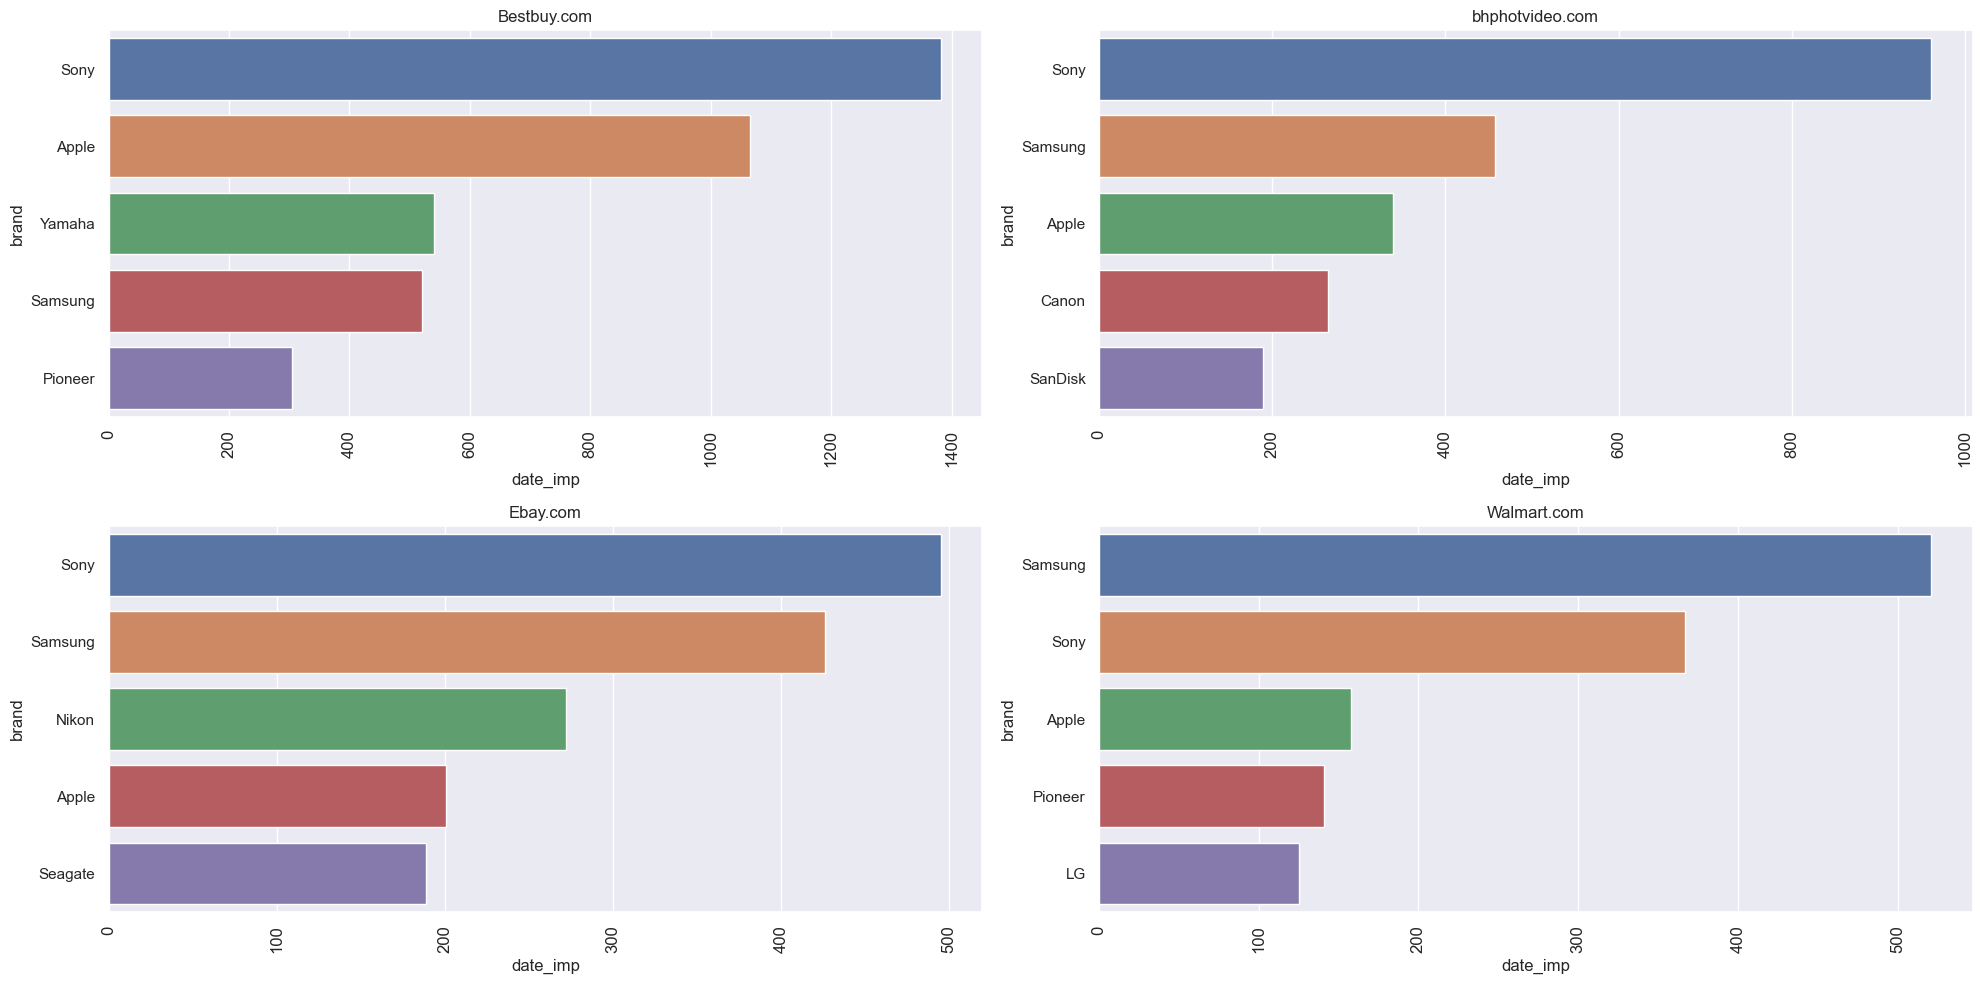

In [23]:
plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
aux8 = df_best[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(y='brand',x='date_imp', data=aux8.head())

plt.subplot(2,2,2)
aux9 = df_bhp[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(y='brand', x='date_imp', data=aux9.head())

plt.subplot(2,2,3)
aux10 = df_ebay[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(y='brand',x='date_imp', data=aux10.head())

plt.subplot(2,2,4)
aux11 = df_walmart[['date_imp', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(y='brand',x='date_imp', data=aux11.head())

plt.tight_layout()

Somente no Walmart que a marca mais vendida é Samsung. Em todos os outros a categoria mais vendida é Sony

### 2.4 Quais os dias que mais vendem?

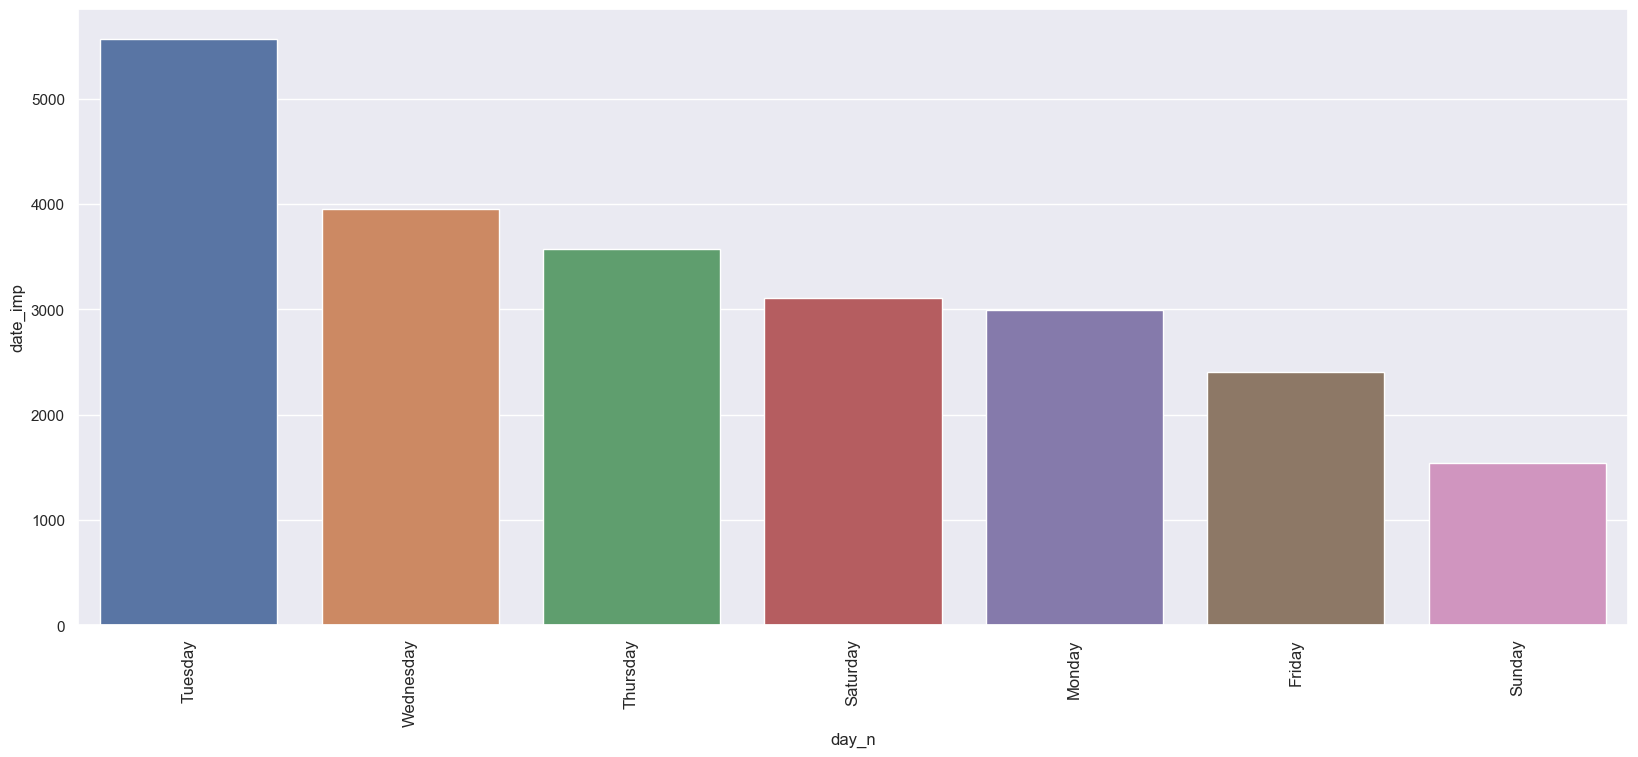

In [24]:
plt.figure(figsize=(20,8))
aux12 = df2[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(x='day_n', y='date_imp', data=aux12);

Terça-feira é o dia que mais vende

### 2.4.1 Quais os dias que mais vendem por loja

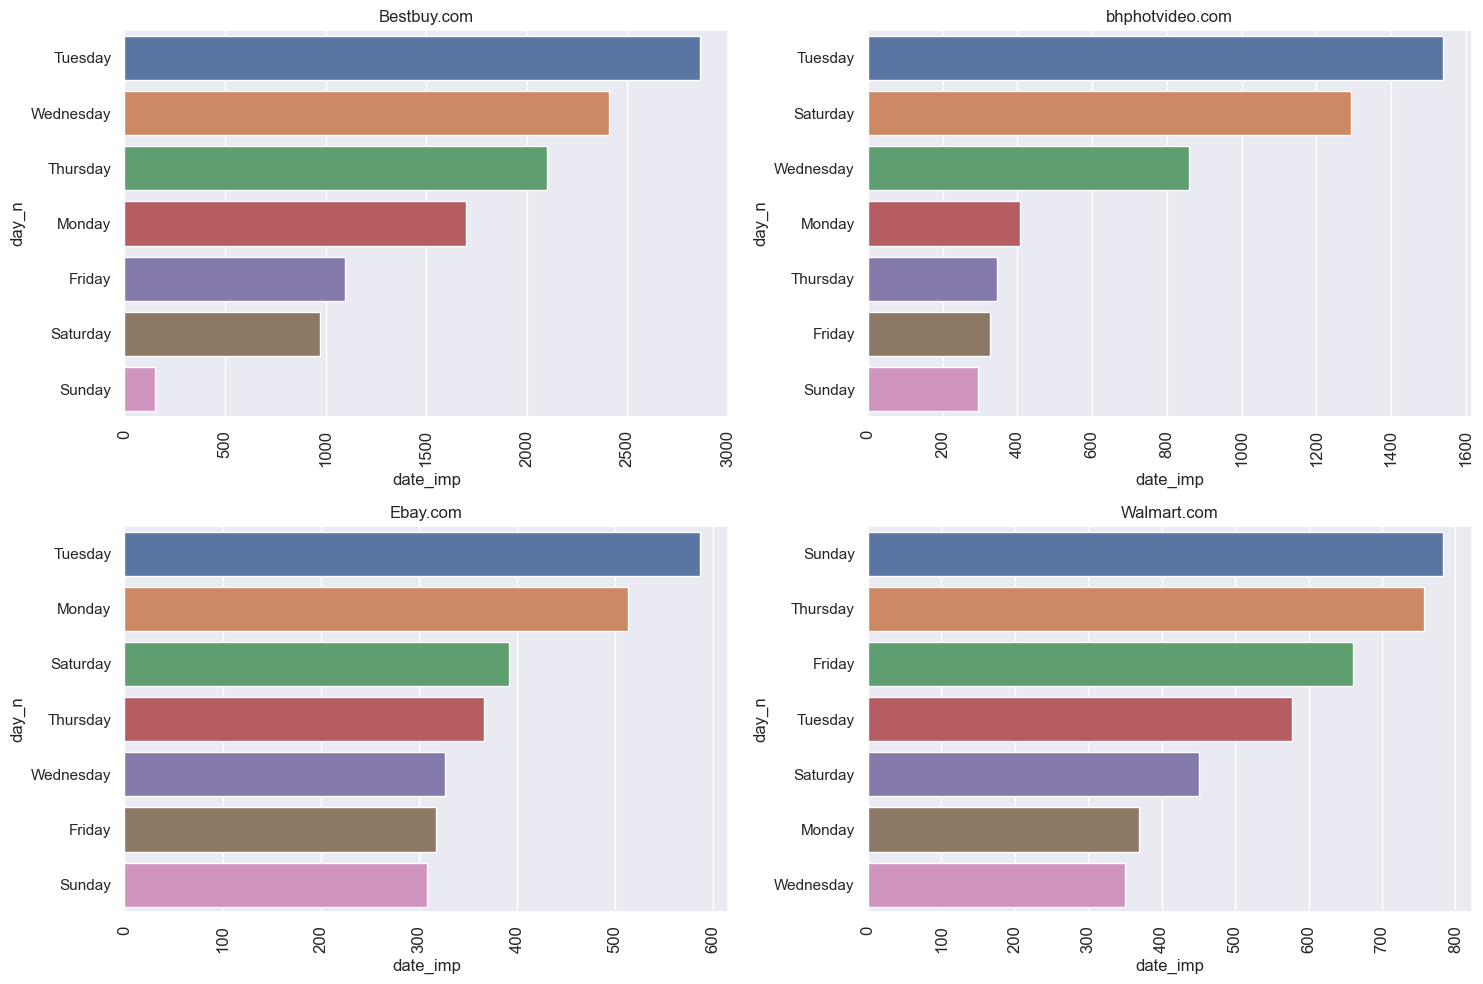

In [25]:
plt.figure(figsize=(15,10))


plt.subplot(2,2,1)
aux13 = df_best[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(y='day_n', x='date_imp', data=aux13)

plt.subplot(2,2,2)
aux14 = df_bhp[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(y='day_n', x='date_imp', data=aux14)

plt.subplot(2,2,3)
aux15 = df_ebay[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(y='day_n', x='date_imp', data=aux15)

plt.subplot(2,2,4)
aux16 = df_walmart[['date_imp', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(y='day_n', x='date_imp', data=aux16)

plt.tight_layout()

Somente no Walmart que as vendas acontecem mais no domingo. Futuramente podemos investigar se tem fundamento ser o target (público-alvo) que compra Samsung ter os domingos para fazer essas compras. O restante as compras acontecem mais na terça-feira! 

#### 2.5 Quais os meses que mais vendem

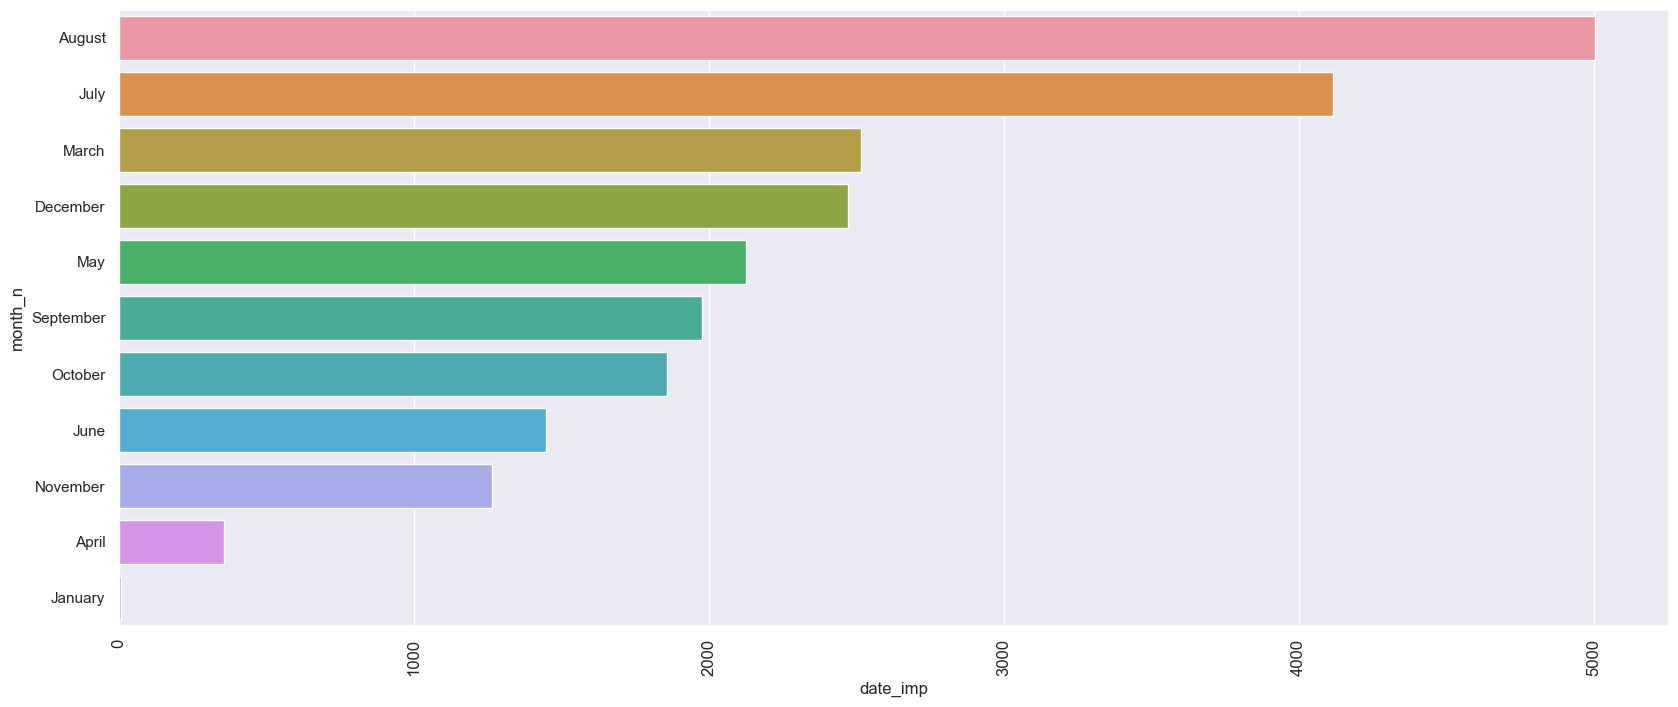

In [26]:
plt.figure(figsize=(20,8))
aux17 = df2[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
sns.barplot(y='month_n', x='date_imp', data=aux17);

#### 2.5.1 Quais os meses que mais vendem por loja

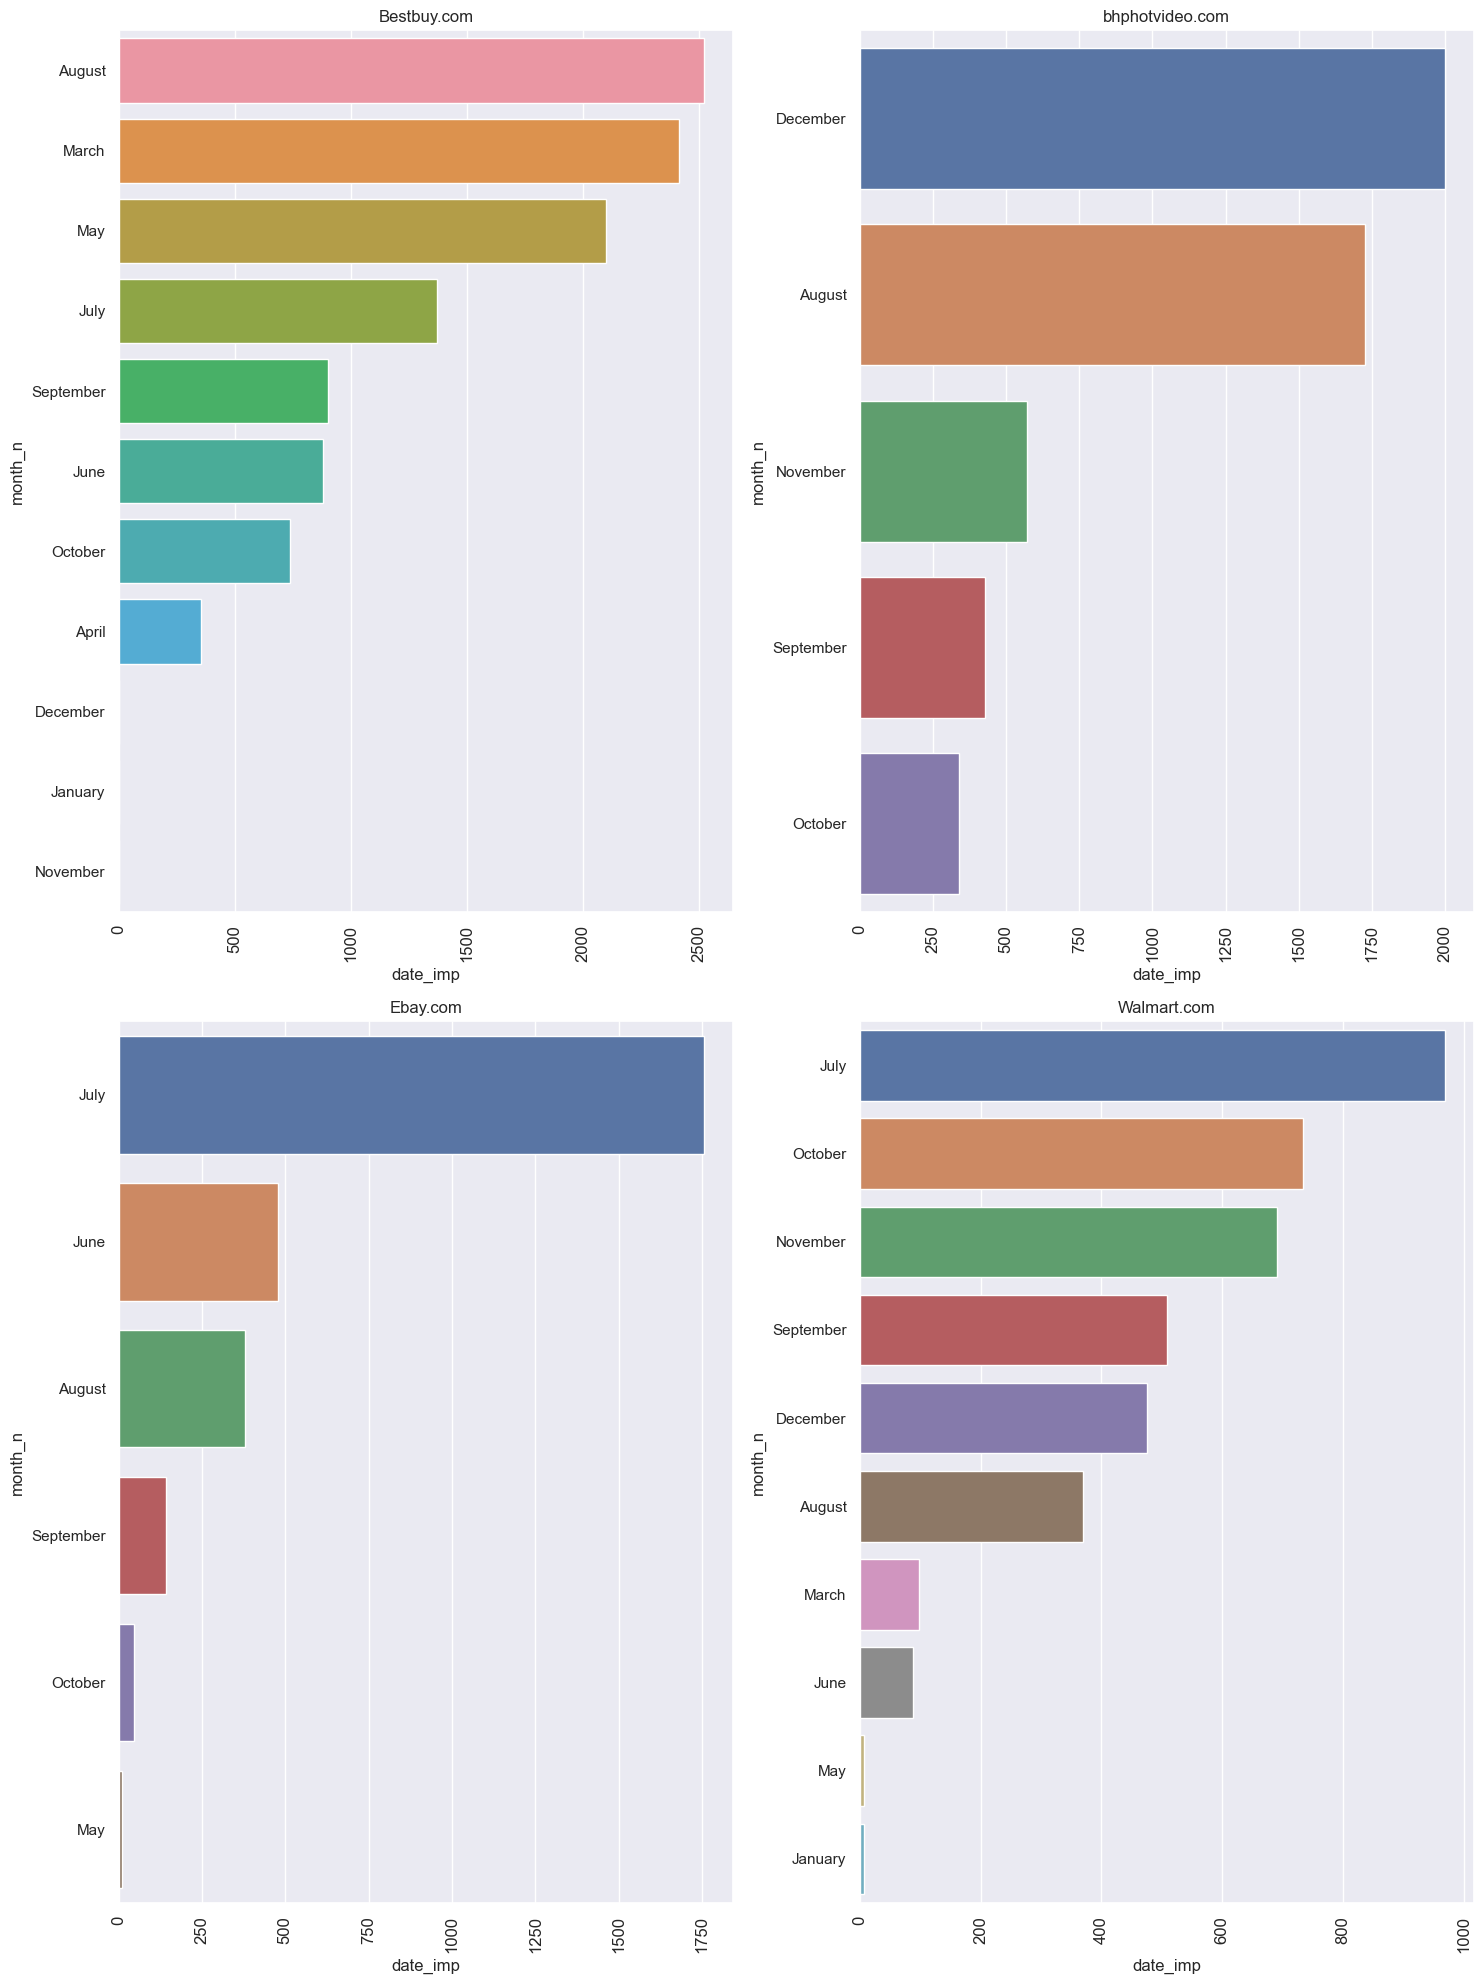

In [27]:
plt.figure(figsize=(15,20))


plt.subplot(2,2,1)
aux18 = df_best[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Bestbuy.com')
sns.barplot(y='month_n', x='date_imp', data=aux18)

plt.subplot(2,2,2)
aux19 = df_bhp[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('bhphotvideo.com')
sns.barplot(y='month_n', x='date_imp', data=aux19)

plt.subplot(2,2,3)
aux20 = df_ebay[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Ebay.com')
sns.barplot(y='month_n', x='date_imp', data=aux20)

plt.subplot(2,2,4)
aux21 = df_walmart[['date_imp', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp', ascending=False)
plt.xticks(rotation=90, fontsize=12)
plt.title('Walmart.com')
sns.barplot(y='month_n', x='date_imp', data=aux21)

plt.tight_layout()

As vendas da BestBuy estão concentradas no mês de Agosto (possivelmente ocorreu alguma promoção ou ofertas durante essa data ou algum fator externo). Essa força de vendas é tão forte que quando fizemos o gráfico das vendas no geral com todas as empresaas Agosto foi o mês que ocorreu mais vendas. 

# 3.0 Feature Engineering

In [28]:
df3 = df2.copy()

Durante esse ensaio vamos utilizar a categoria mais vendida na loja que mais vendeu no dataseet. Portanto, vamos aplicar o filtro de Categoria = Laptop, computer e BestBuy como merchant

## 3.1 Categoria mais vendida da BestBuy.com 

In [29]:
df_laptop = df_best[df_best['category_name'] == 'laptop, computer']

In [30]:
# check NA
df_laptop.isna().sum()

date_imp             0
category_name        0
name                 0
price                0
disc_price           0
merchant             0
disc_percentage      0
is_sale              0
imp_count            0
brand                0
p_description        0
dateadded            0
dateseen             0
dateupdated          0
manufacturer       627
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

In [31]:
test = df_laptop.groupby(['name', 'week_number']).agg({'disc_price': 'mean', 'date_imp': 'count'}).reset_index()
test.head()

,name,week_number,disc_price,date_imp
0,"12 MacBook (Mid 2017, Gold)",30,1599.99,1
1,"12 MacBook (Mid 2017, Gold)",31,1551.99,8
2,"12 MacBook (Mid 2017, Gold)",33,1454.99,2
3,"12 MacBook (Mid 2017, Gold)",34,1551.99,2
4,"12 MacBook (Mid 2017, Gold)",35,1474.49,4


In [32]:
#criando dataframe dos valores(x)
x_price = test.pivot(index= 'week_number' , columns= 'name', values='disc_price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver""","Apple 13.3 MacBook Air ( Silver)""","Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English""","Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver""","Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English""","Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum""","Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red""","Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver""","Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M""","Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd""","Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd""","Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb""","Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)""","Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq""","Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me...""","Details About Razer Blade Laptop 14 Full Hd (i77700hq""","Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop""","HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,426.495,NaN,2799.99,2599.99,NaN,899.99,236.495,1599.99,NaN,NaN,NaN,600.495,1499.99,700.495,1999.99,

In [33]:
y_demand = test.pivot(index= 'week_number' , columns= 'name', values='date_imp')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver""","Apple 13.3 MacBook Air ( Silver)""","Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English""","Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver""","Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English""","Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum""","Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red""","Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver""","Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M""","Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd""","Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd""","Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb""","Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)""","Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq""","Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me...""","Details About Razer Blade Laptop 14 Full Hd (i77700hq""","Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop""","HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,NaN,NaN,4.0,NaN,3.0,6.0,NaN,2.0,4.0,1.0,NaN,NaN,NaN,4.0,4.0,4.0,5.0,NaN,1.0,4.0,2.0,1.0,2.0,NaN,4.0,NaN,1.0,2.0,

# 4. Data Describe

## 4.1 Data Dimension

In [34]:
print(f'Number of rows: {x_price.shape[0]}')
print(f'Number of columns: {x_price.shape[1]}')

Number of rows: 26
Number of columns: 40


In [35]:
print(f'Number of rows: {y_demand.shape[0]}')
print(f'Number of columns: {y_demand.shape[1]}')

Number of rows: 26
Number of columns: 40


## 4.2 Data Types

In [36]:
x_price.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

In [37]:
y_demand.dtypes

week_number                                                                                                                                                                                              int64
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            float64
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          float64
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           float64
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                         

## 4.3 Check NA

In [38]:
x_price.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

In [39]:
y_demand.isna().sum()

week_number                                                                                                                                                                                             0
12 MacBook (Mid 2017, Gold)                                                                                                                                                                            17
12 MacBook (Mid 2017, Silver)                                                                                                                                                                          18
12.3 32GB Multi-Touch 2-in-1 Chromebook Plus                                                                                                                                                           13
13.3 MacBook Air (Mid 2017, Silver)                                                                                                                                                             

## 4.4 Replace NA

Semanas que não vendi, posso colocar um 0 como preço porém ocorrerá muita oscilação porque parece que o preço que a loja colocou seria 0. Na prática o caminho que encontrei foi ocupar os NAs como a mediana pois dessa forma não acrescentamos outliers. 

Não irá influenciar muito no produto final (muito robusta no oscilação de preço)

In [40]:
a = np.round(x_price.median(), 2)
x_price.fillna(a, inplace=True)
x_price.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver""","Apple 13.3 MacBook Air ( Silver)""","Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English""","Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver""","Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English""","Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum""","Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red""","Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver""","Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M""","Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd""","Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd""","Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb""","Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)""","Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq""","Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me...""","Details About Razer Blade Laptop 14 Full Hd (i77700hq""","Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop""","HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,1551.99,1299.99,415.500,949.99,2618.99,2353.99,304.99,829.99,249.000,1899.99,1409.99,1387.49,1879.99,1139.990,1365.99,1255.990,1745.99,1236.99,799.99,1399.990,1634.990,1664.99,1780.49,799.99,508.49,854.99,1146.74,1994.990,162.74,819.99,463.74,218.49,601.49,415.99,337.49,2

In [41]:
y_demand.fillna(0, inplace=True)
y_demand.head()

,week_number,"12 MacBook (Mid 2017, Gold)","12 MacBook (Mid 2017, Silver)",12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,"13.3 MacBook Air (Mid 2017, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Silver)","15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)",ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X,"Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray""",Acer 15.6 Chromebook CB5-571-C4G4,"Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray""","Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver""","Apple 13.3 MacBook Air ( Silver)""","Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English""","Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver""","Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English""","Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum""","Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red""","Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver""","Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M""","Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd""","Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd""","Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb""","Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)""","Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq""","Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me...""","Details About Razer Blade Laptop 14 Full Hd (i77700hq""","Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop""","HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black""","HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10""","Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue""","Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS""","Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1","Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB""","MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black""","New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10""","Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black""","Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"""
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0.0,0.0,4.0,0.0,3.0,6.0,0.0,2.0,4.0,1.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,0.0,1.0,4.0,2.0,1.0,2.0,0.0,4.0,0.0,1.0,2.0,

## 4.5 Descriptive Statistic

In [42]:
# central tendency
ct1_x = pd.DataFrame(x_price.apply(np.mean) ).T   # média
ct2_x = pd.DataFrame(x_price.apply(np.median) ).T  # mediana

# dispersion
d1_x = pd.DataFrame(x_price.apply(np.std) ).T # Desvio padrão
d2_x = pd.DataFrame(x_price.apply(min) ).T # valor mínimo
d3_x = pd.DataFrame(x_price.apply(max) ).T # valor máximo
d4_x = pd.DataFrame(x_price.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5_x = pd.DataFrame(x_price.apply( lambda x: x.skew())).T #skewness
d6_x = pd.DataFrame(x_price.apply( lambda x : x.kurtosis())).T # kurtosis

m_x = pd.concat( [d2_x, d3_x, d4_x, ct1_x, ct2_x, d1_x, d5_x, d6_x]).T.reset_index()
m_x.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m_x

,att,min,max,range,mean,median,std,skew,kurt
0,week_number,4.000,49.00,45.000,27.076923,29.00,11.945141,-0.186167,-0.905369
1,"12 MacBook (Mid 2017, Gold)",1454.990,1599.99,145.000,1547.124615,1551.99,25.648346,-2.457686,8.310054
2,"12 MacBook (Mid 2017, Silver)",1234.990,1299.99,65.000,1295.990000,1299.99,14.317821,-3.735032,13.784949
3,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,372.995,449.00,76.005,413.189808,415.50,15.423120,-1.054924,2.830858
4,"13.3 MacBook Air (Mid 2017, Silver)",911.990,969.99,58.000,949.297692,949.99,8.393080,-2.975611,16.702015
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",2327.990,2799.99,472.000,2607.393846,2618.99,112.833610,-1.131897,2.049122
6,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",2023.990,2599.99,576.000,2346.913077,2353.99,122.523757,-0.274833,1.347179
7,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,237.490,313.49,76.000,299.720769,304.99,16.347918,-2.916993,8.218479
8,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,764.990,899.99,135.000,834.028462,829.99,27.804926,0.937281,2.943939
9,Acer 15.6 Chromebook CB5-571-C4G4,199.990,249.00,49.010,242.479231,249.00,14.017001,-2.306458,4.514429


In [43]:
# central tendency
ct1_y = pd.DataFrame(y_demand.apply(np.mean) ).T   # média
ct2_y = pd.DataFrame(y_demand.apply(np.median) ).T  # mediana

# dispersion
d1_y = pd.DataFrame(y_demand.apply(np.std) ).T # Desvio padrão
d2_y = pd.DataFrame(y_demand.apply(min) ).T # valor mínimo
d3_y = pd.DataFrame(y_demand.apply(max) ).T # valor máximo
d4_y = pd.DataFrame(y_demand.apply( lambda x: x.max() - x.min())).T # Variação entre o mínimo e máxilo valor
d5_y = pd.DataFrame(y_demand.apply( lambda x: x.skew())).T #skewness
d6_y = pd.DataFrame(y_demand.apply( lambda x : x.kurtosis())).T # kurtosis

m_y = pd.concat( [d2_y, d3_y, d4_y, ct1_y, ct2_y, d1_y, d5_y, d6_y]).T.reset_index()
m_y.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurt']
m_y

,att,min,max,range,mean,median,std,skew,kurt
0,week_number,4.0,49.0,45.0,27.076923,29.0,11.945141,-0.186167,-0.905369
1,"12 MacBook (Mid 2017, Gold)",0.0,8.0,8.0,0.961538,0.0,1.764626,2.738840,9.024976
2,"12 MacBook (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
3,12.3 32GB Multi-Touch 2-in-1 Chromebook Plus,0.0,4.0,4.0,1.038462,0.5,1.125945,0.606680,-0.428079
4,"13.3 MacBook Air (Mid 2017, Silver)",0.0,2.0,2.0,0.384615,0.0,0.788227,1.658711,0.807453
5,"15.4 MacBook Pro with Touch Bar (Late 2016, Si...",0.0,6.0,6.0,1.153846,0.0,1.609881,1.437577,1.673167
6,"15.4 MacBook Pro with Touch Bar (Late 2016, Sp...",0.0,12.0,12.0,3.230769,1.0,3.885948,0.951022,-0.225438
7,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,0.0,2.0,2.0,0.538462,0.0,0.887120,1.105353,-0.849951
8,Acer - 2-in-1 15.6 Refurbished Touch-Screen La...,0.0,2.0,2.0,0.384615,0.0,0.624926,1.474017,1.189701
9,Acer 15.6 Chromebook CB5-571-C4G4,0.0,4.0,4.0,0.769231,1.0,0.932643,1.711207,4.066693


# 5. EDA New Dataframe

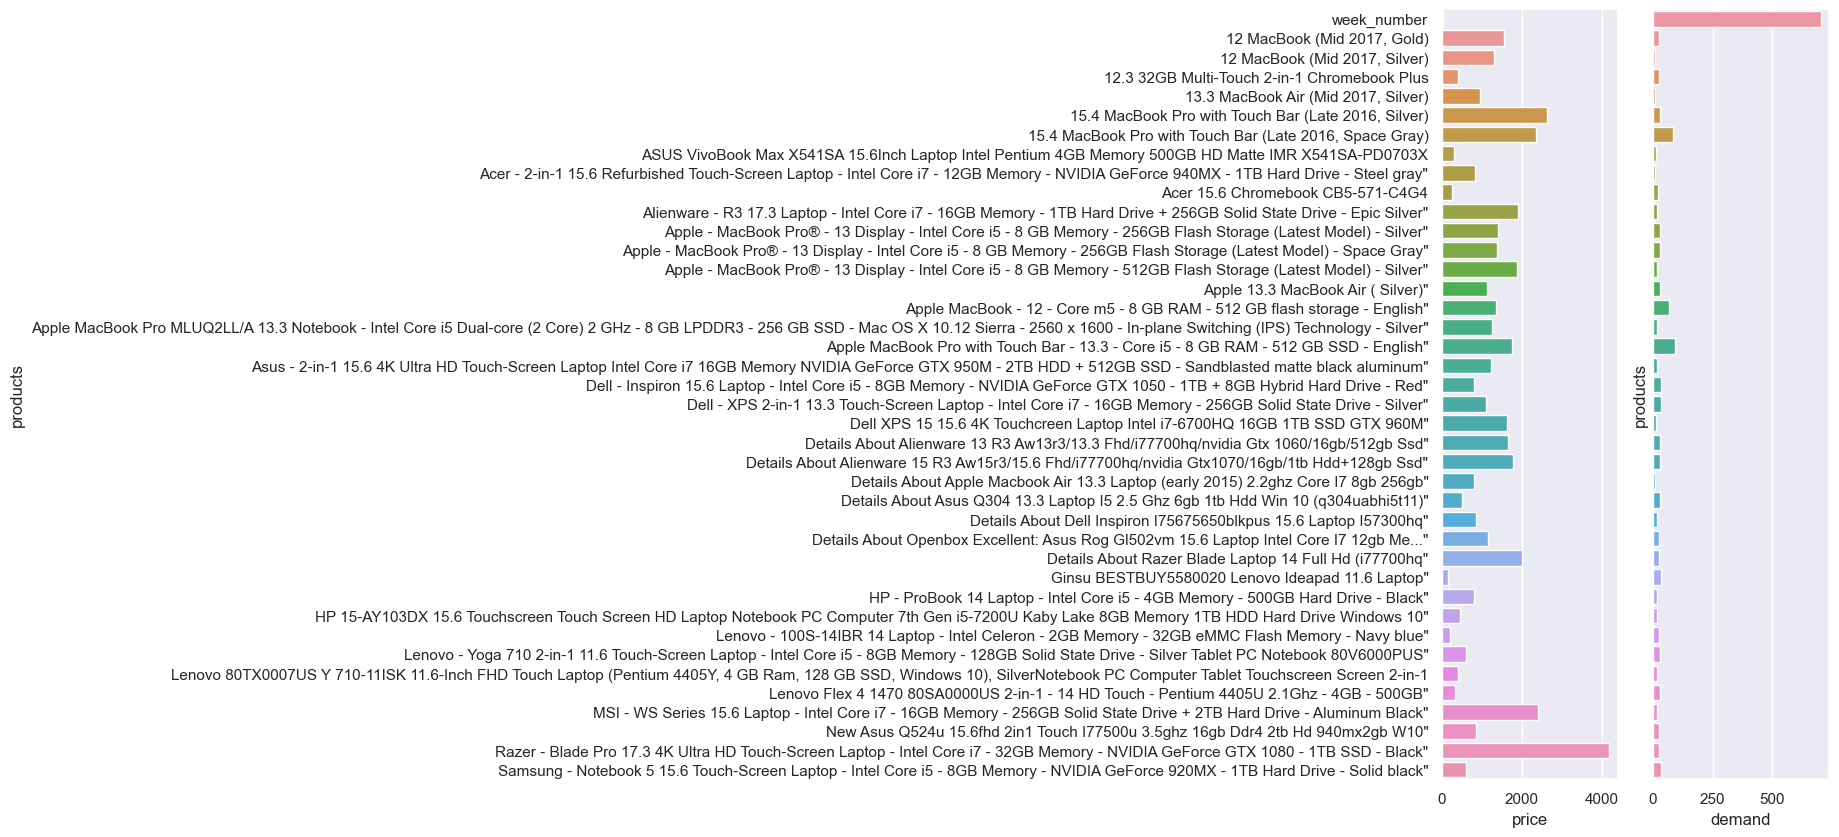

In [44]:
plt.figure(figsize=(5,10))
plt.subplot(1, 2, 1)
aux1 = pd.DataFrame(x_price.apply( lambda x: x.median())).reset_index()
aux1.columns = ['products', 'price']
sns.barplot(y='products', x='price', data=aux1)

plt.subplot(1, 2, 2)
aux2 = pd.DataFrame(y_demand.apply( lambda x: x.sum())).reset_index()
aux2.columns = ['products', 'demand']
sns.barplot(y='products', x='demand', data=aux2);
plt.yticks([]);  # Removendo os rótulos do eixo X


In [45]:
a =   ['12 MacBook (Mid 2017, Gold)', '12 MacBook (Mid 2017, Silver)',
       '12.3 32GB Multi-Touch 2-in-1 Chromebook Plus',
       '13.3 MacBook Air (Mid 2017, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Silver)',
       '15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)',
       'ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X',
       'Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"',
       'Acer 15.6 Chromebook CB5-571-C4G4',
       'Alienware - R3 17.3 Laptop - Intel Core i7 - 16GB Memory - 1TB Hard Drive + 256GB Solid State Drive - Epic Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Silver"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 256GB Flash Storage (Latest Model) - Space Gray"',
       'Apple - MacBook Pro® - 13 Display - Intel Core i5 - 8 GB Memory - 512GB Flash Storage (Latest Model) - Silver"',
       'Apple 13.3 MacBook Air ( Silver)"',
       'Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 GB flash storage - English"',
       'Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - Intel Core i5 Dual-core (2 Core) 2 GHz - 8 GB LPDDR3 - 256 GB SSD - Mac OS X 10.12 Sierra - 2560 x 1600 - In-plane Switching (IPS) Technology - Silver"',
       'Apple MacBook Pro with Touch Bar - 13.3 - Core i5 - 8 GB RAM - 512 GB SSD - English"',
       'Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen Laptop Intel Core i7 16GB Memory NVIDIA GeForce GTX 950M - 2TB HDD + 512GB SSD - Sandblasted matte black aluminum"',
       'Dell - Inspiron 15.6 Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce GTX 1050 - 1TB + 8GB Hybrid Hard Drive - Red"',
       'Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive - Silver"',
       'Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7-6700HQ 16GB 1TB SSD GTX 960M"',
       'Details About Alienware 13 R3 Aw13r3/13.3 Fhd/i77700hq/nvidia Gtx 1060/16gb/512gb Ssd"',
       'Details About Alienware 15 R3 Aw15r3/15.6 Fhd/i77700hq/nvidia Gtx1070/16gb/1tb Hdd+128gb Ssd"',
       'Details About Apple Macbook Air 13.3 Laptop (early 2015) 2.2ghz Core I7 8gb 256gb"',
       'Details About Asus Q304 13.3 Laptop I5 2.5 Ghz 6gb 1tb Hdd Win 10 (q304uabhi5t11)"',
       'Details About Dell Inspiron I75675650blkpus 15.6 Laptop I57300hq"',
       'Details About Openbox Excellent: Asus Rog Gl502vm 15.6 Laptop Intel Core I7 12gb Me..."',
       'Details About Razer Blade Laptop 14 Full Hd (i77700hq"',
       'Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"',
       'HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"',
       'HP 15-AY103DX 15.6 Touchscreen Touch Screen HD Laptop Notebook PC Computer 7th Gen i5-7200U Kaby Lake 8GB Memory 1TB HDD Hard Drive Windows 10"',
       'Lenovo - 100S-14IBR 14 Laptop - Intel Celeron - 2GB Memory - 32GB eMMC Flash Memory - Navy blue"',
       'Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - 128GB Solid State Drive - Silver Tablet PC Notebook 80V6000PUS"',
       'Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD Touch Laptop (Pentium 4405Y, 4 GB Ram, 128 GB SSD, Windows 10), SilverNotebook PC Computer Tablet Touchscreen Screen 2-in-1',
       'Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD Touch - Pentium 4405U 2.1Ghz - 4GB - 500GB"',
       'MSI - WS Series 15.6 Laptop - Intel Core i7 - 16GB Memory - 256GB Solid State Drive + 2TB Hard Drive - Aluminum Black"',
       'New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5ghz 16gb Ddr4 2tb Hd 940mx2gb W10"',
       'Razer - Blade Pro 17.3 4K Ultra HD Touch-Screen Laptop - Intel Core i7 - 32GB Memory - NVIDIA GeForce GTX 1080 - 1TB SSD - Black"',
       'Samsung - Notebook 5 15.6 Touch-Screen Laptop - Intel Core i5 - 8GB Memory - NVIDIA GeForce 920MX - 1TB Hard Drive - Solid black"']

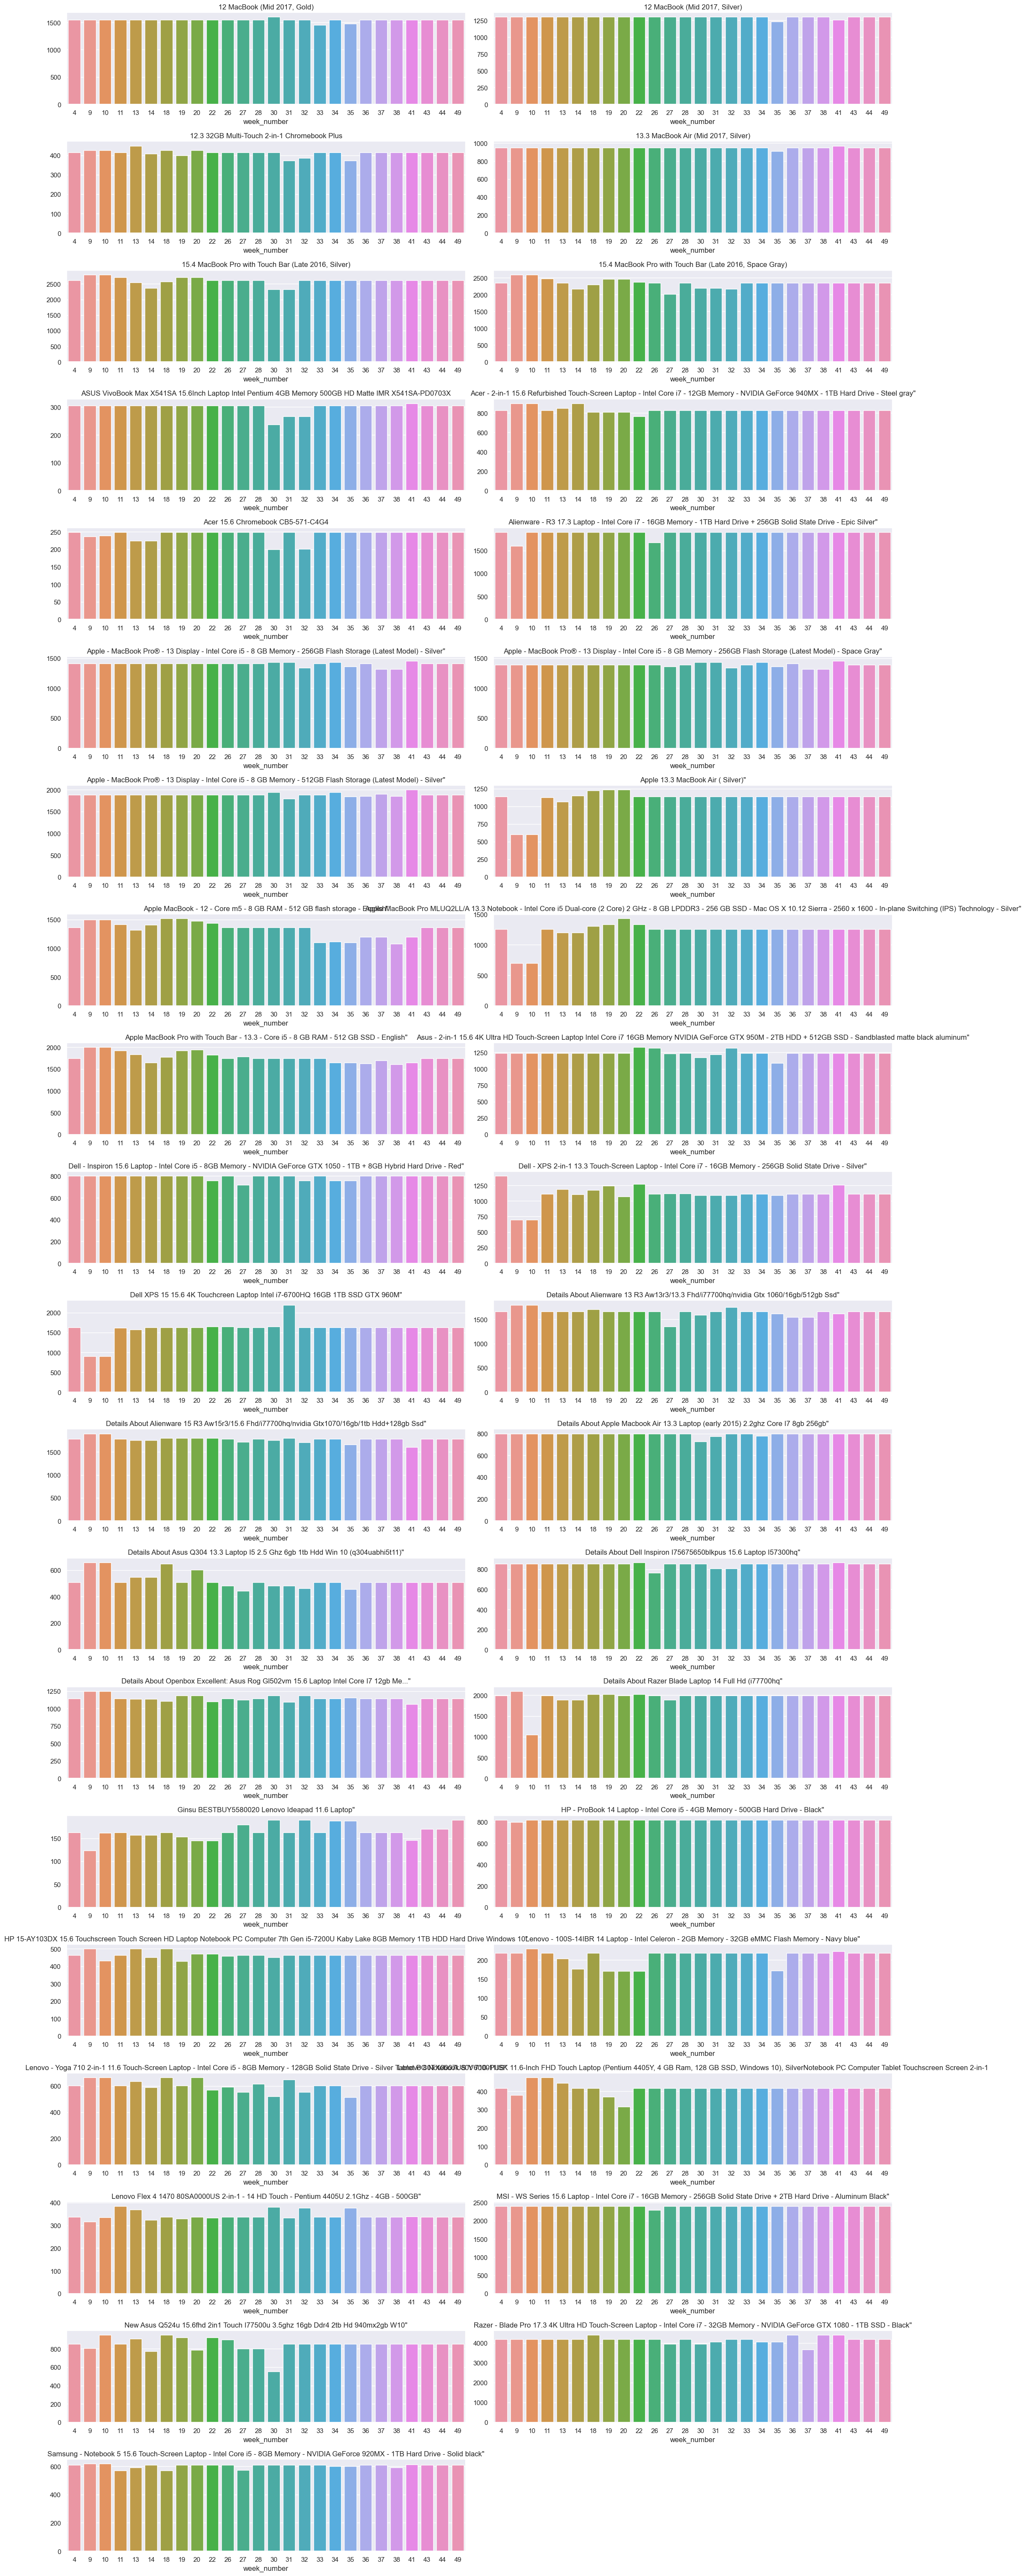

In [46]:
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(x_price.columns), 1):
    plt.subplot(20,2,k)
    sns.barplot(data=x_price, x=x_price['week_number'], y=x_price[x_price.columns[k]]);
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

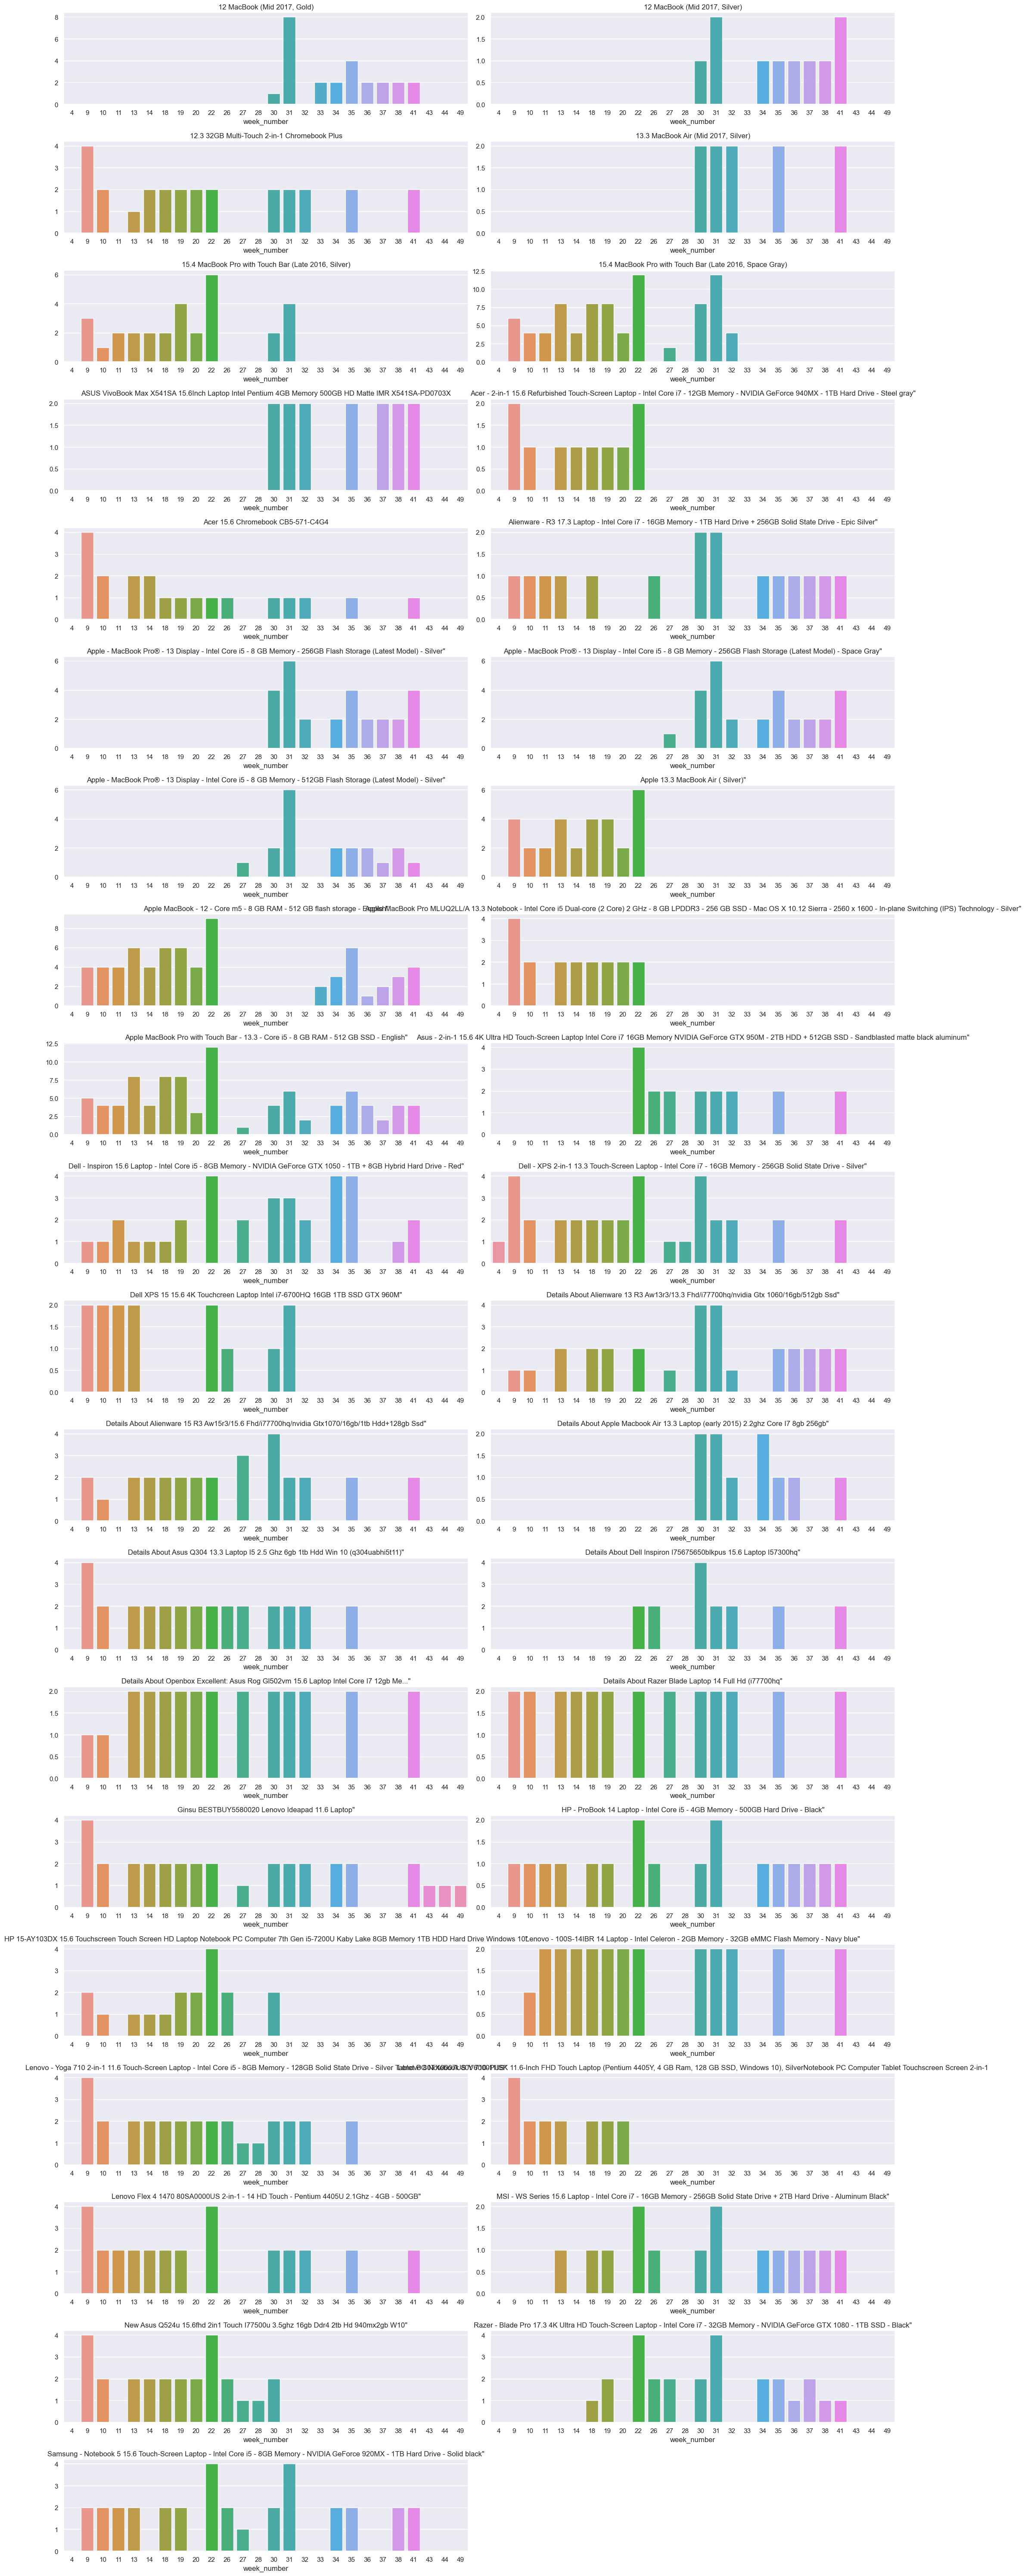

In [47]:
plt.figure(figsize=(20, 60))
for k in np.arange(1, len(y_demand.columns), 1):
    plt.subplot(20,2,k)
    sns.barplot(data=y_demand, x=y_demand['week_number'], y=y_demand[y_demand.columns[k]]);
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

# 6. Machine Learning

Revisão os dados vem da BestBuy.com -> categoria = laptop, computer

Vamos aplicar o método dos Minímos Quadrados para conseguir a generalização da equação

## 6.1 12 MacBook (Mid 2017, Gold)

In [48]:
import statsmodels.api as sm
x_laptop = x_price['12 MacBook (Mid 2017, Gold)']
y_laptop = y_demand['12 MacBook (Mid 2017, Gold)']
X_laptop = sm.add_constant(x_laptop)
model = sm.OLS(y_laptop, X_laptop)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     12 MacBook (Mid 2017, Gold)   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                  0.042
Method:                          Least Squares   F-statistic:                     2.108
Date:                         Mon, 12 Feb 2024   Prob (F-statistic):              0.159
Time:                                 14:12:45   Log-Likelihood:                -50.564
No. Observations:                           26   AIC:                             105.1
Df Residuals:                               24   BIC:                             107.6
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

## 6.2 Todas as colunas

In [49]:
results_values_laptop = {
                            "name": [],
                            "price_elasticity": [],
                            "price_mean": [],
                            "quantity_mean": [],
                            "intercept": [],
                            "slope": [],
                            "rsquared": [],
                            "p_value": []
                        }


for column in x_price.columns[1:]:
    column_points = []
    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df = pd.DataFrame(list(column_points), columns=['x_price', 'y_demand'])
    

    x_laptop = df['x_price']
    y_laptop = df['y_demand']
    X_laptop = sm.add_constant(x_laptop)
    
    #machine learning
    model = sm.OLS(y_laptop, X_laptop)
    results = model.fit()

    #Vamos filtrar pelo P valor, caso o P valor seja maior do que 0,05 não podemos afirmar que ocorreu uma generalização
    if results.f_pvalue < 0.05:
        
        rsquared = results.rsquared
        p_value = results.f_pvalue
        intercept, slope = results.params
        mean_price = np.mean(x_laptop)
        mean_quantity = np.mean(y_laptop)


        price_elasticity = slope*(mean_price/mean_quantity)

        results_values_laptop['name'].append(column)
        results_values_laptop['price_elasticity'].append(price_elasticity)
        results_values_laptop['price_mean'].append(mean_price)
        results_values_laptop['quantity_mean'].append(mean_quantity)
        results_values_laptop['intercept'].append(intercept)
        results_values_laptop['slope'].append(slope)
        results_values_laptop['rsquared'].append(rsquared)
        results_values_laptop['p_value'].append(p_value)

df_elasticity = pd.DataFrame.from_dict(results_values_laptop)

In [50]:
df_elasticity

,name,price_elasticity,price_mean,quantity_mean,intercept,slope,rsquared,p_value
0,"12 MacBook (Mid 2017, Silver)",-65.115595,1295.990000,0.384615,25.429075,-0.019325,0.196027,0.023508
1,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643,299.720769,0.538462,9.175192,-0.028816,0.281984,0.005251
2,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545,242.479231,0.769231,7.255804,-0.026751,0.161645,0.041743
3,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642,1224.221154,0.692308,4.859060,-0.003404,0.236464,0.011774
4,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537,790.759231,1.307692,31.650779,-0.038372,0.327839,0.002237
5,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723,795.509231,0.384615,26.602201,-0.032957,0.510312,0.000041
6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399,209.663077,0.961538,6.778268,-0.027743,0.277667,0.005677


12 MacBook (Mid 2017, Silver) e Details About Apple Macbook Air 13.3 Laptop há uma alta variação de elasticidade qualquer diminuição de preço há uma alta mudança na demanda 

## 7. Elasticidade

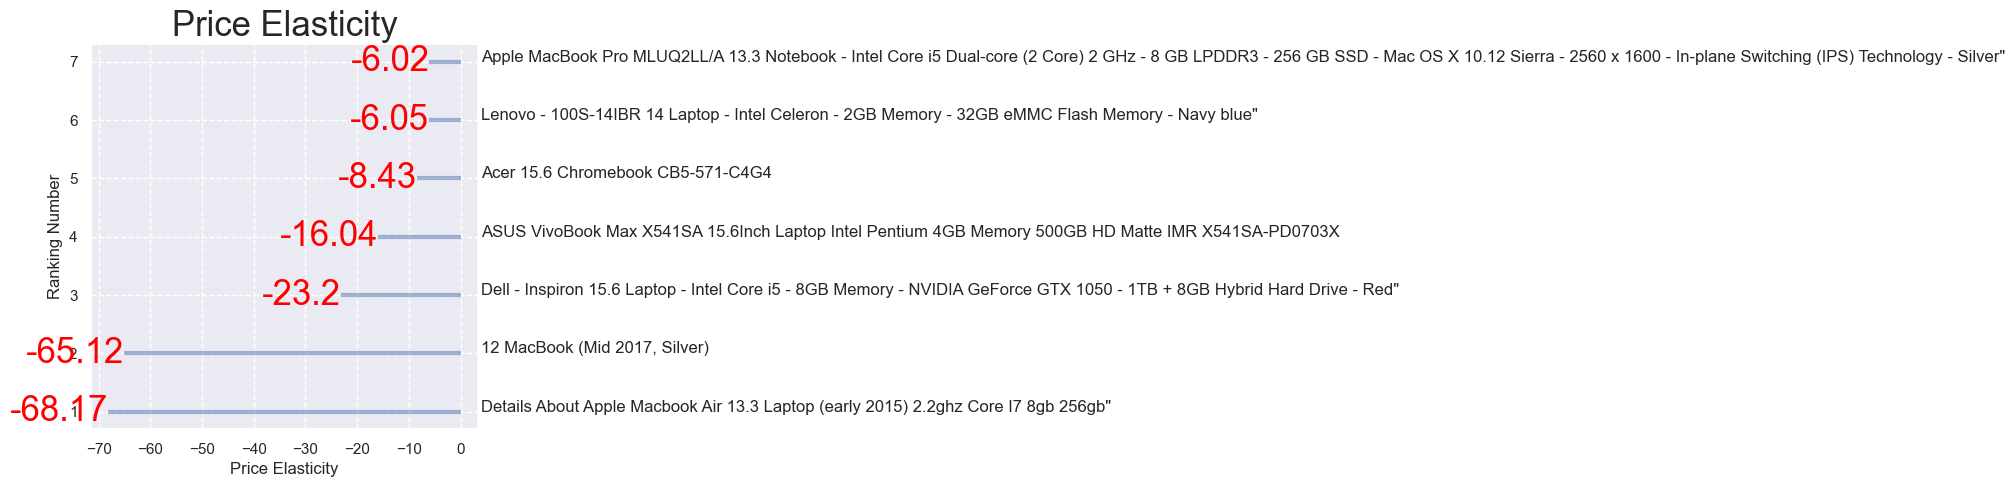

In [92]:
df_elasticity['ranking'] = df_elasticity['price_elasticity'].rank(ascending=True).astype(int)
df_elasticity = df_elasticity.reset_index(drop=True)

plt.figure(figsize=(5, 5))
plt.hlines(y=df_elasticity['ranking'], xmin=0, xmax=df_elasticity['price_elasticity'], alpha=0.5, linewidth=3)

for name, p in zip(df_elasticity['name'], df_elasticity['ranking']):
    plt.text(4, p, name)


# Add elasticity labels
for x, y, s in zip(df_elasticity['price_elasticity'], df_elasticity['ranking'], df_elasticity['price_elasticity']):
    plt.text(x, y, round(s, 2), horizontalalignment='right' if x < 0 else 'left',
             verticalalignment='center',
             fontdict={'color': 'red' if x < 0 else 'green', 'size': 25})

plt.gca().set(ylabel='Ranking Number', xlabel='Price Elasticity')
plt.title('Price Elasticity', fontdict={'size': 25})
plt.grid(linestyle='--')


In [52]:
df_order_elasticity = df_elasticity[['ranking', 'name', 'price_elasticity']].sort_values(by='price_elasticity', ascending=False)
df_order_elasticity

,ranking,name,price_elasticity
3,7,Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...,-6.018642
6,6,Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...,-6.049399
2,5,Acer 15.6 Chromebook CB5-571-C4G4,-8.432545
1,4,ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...,-16.039643
4,3,Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...,-23.203537
0,2,"12 MacBook (Mid 2017, Silver)",-65.115595
5,1,Details About Apple Macbook Air 13.3 Laptop (e...,-68.165723
